In [5]:
"""
A prototype implementation of Use Case 9
"""

import xarray as xr
import os
import numpy as np
from ipywidgets import interact
%matplotlib inline

In [6]:
# This is just a prototype, hence the hard coded paths
CLOUD_ECV_PATH = '/home/ccitbx/cci_data/cloud/2008/'
AEROSOL_ECV_PATH = '/home/ccitbx/cci_data/aerosol/2008_monthly/'

In [7]:
def read_data(path):
    """
    Read in multiple netCDF files and combine them in an xarray dataset.

    :rtype: xr.Dataset
    :param path: Path to the folder
    :return: The resulting dataset
    """
    path = path + os.sep + '*.nc'
    print(path)
    dataset = xr.open_mfdataset(path, concat_dim='time')
    return dataset

In [8]:
ds_clouds = read_data(CLOUD_ECV_PATH)
ds_aerosol = read_data(AEROSOL_ECV_PATH)

/home/ccitbx/cci_data/cloud/2008//*.nc
/home/ccitbx/cci_data/aerosol/2008_monthly//*.nc


In [9]:
times = np.arange(0,11,1)
datasets = ['clouds', 'aerosol']

def plot_datasets(dataset, t):
    if dataset == 'aerosol':
        array_slice = ds_aerosol.AOD550_mean.isel(time=t)
    elif dataset == 'clouds':
        array_slice = ds_clouds.cc_total.isel(time=t)
    array_slice.plot()

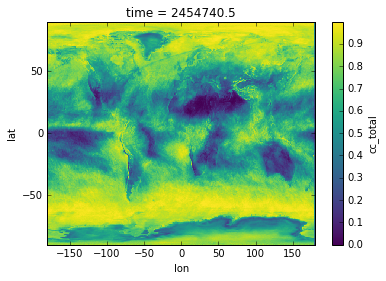

In [10]:
interact(plot_datasets, dataset = datasets, t=(0,11,1))